In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import requests, zipfile, io
from sklearn.model_selection import train_test_split

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

## Banknote dataset

https://archive.ics.uci.edu/dataset/267/banknote+authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.  

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)



In [2]:
zip_file_url = "https://archive.ics.uci.edu/static/public/267/banknote+authentication.zip"

r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("./banknote_dataset")

In [3]:
dataset = pd.read_csv("./banknote_dataset/data_banknote_authentication.txt", header=None,
                      names=["var_wavelet", "skew_wavelet", "kurtosis_wavelet", "entropy", "authentic"])
dataset

,var_wavelet,skew_wavelet,kurtosis_wavelet,entropy,authentic
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
X = dataset[["var_wavelet", "skew_wavelet", "kurtosis_wavelet", "entropy"]]
y = dataset["authentic"]

print(X.shape)
print(y.shape)

(1372, 4)
(1372,)


In [5]:
dataset.describe()

,var_wavelet,skew_wavelet,kurtosis_wavelet,entropy,authentic
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
dataset.dtypes

var_wavelet         float64
skew_wavelet        float64
kurtosis_wavelet    float64
entropy             float64
authentic             int64
dtype: object

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(919, 4)
(919,)
(453, 4)
(453,)


In [8]:
model = Sequential(name='Banknotes')
model.add(Dense(30, input_dim = 4, activation='relu', name='Hidden-1'))
model.add(Dense(10, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='sigmoid', name='Output'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "Banknotes"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 30)                150       
                                                                 
 Hidden-2 (Dense)            (None, 10)                310       
                                                                 
 Output (Dense)              (None, 1)                 11        
                                                                 
Total params: 471 (1.84 KB)
Trainable params: 471 (1.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
23/23 [==============================] - 3s 26ms/step - loss: 0.6841 - accuracy: 0.5578 - val_loss: 0.5833 - val_accuracy: 0.5435
Epoch 2/20
23/23 [==============================] - 0s 6ms/step - loss: 0.4692 - accuracy: 0.6476 - val_loss: 0.4334 - val_accuracy: 0.7337
Epoch 3/20
23/23 [==============================] - 0s 7ms/step - loss: 0.3712 - accuracy: 0.8299 - val_loss: 0.3512 - val_accuracy: 0.8967
Epoch 4/20
23/23 [==============================] - 0s 7ms/step - loss: 0.2943 - accuracy: 0.9320 - val_loss: 0.2749 - val_accuracy: 0.9511
Epoch 5/20
23/23 [==============================] - 0s 7ms/step - loss: 0.2357 - accuracy: 0.9769 - val_loss: 0.2200 - val_accuracy: 0.9946
Epoch 6/20
23/23 [==============================] - 1s 35ms/step - loss: 0.1881 - accuracy: 0.9905 - val_loss: 0.1761 - val_accuracy: 1.0000
Epoch 7/20
23/23 [==============================] - 0s 9ms/step - loss: 0.1413 - accuracy: 1.0000 - val_loss: 0.1185 - val_accuracy: 1.0000
Epoch 8/20
23/23 [

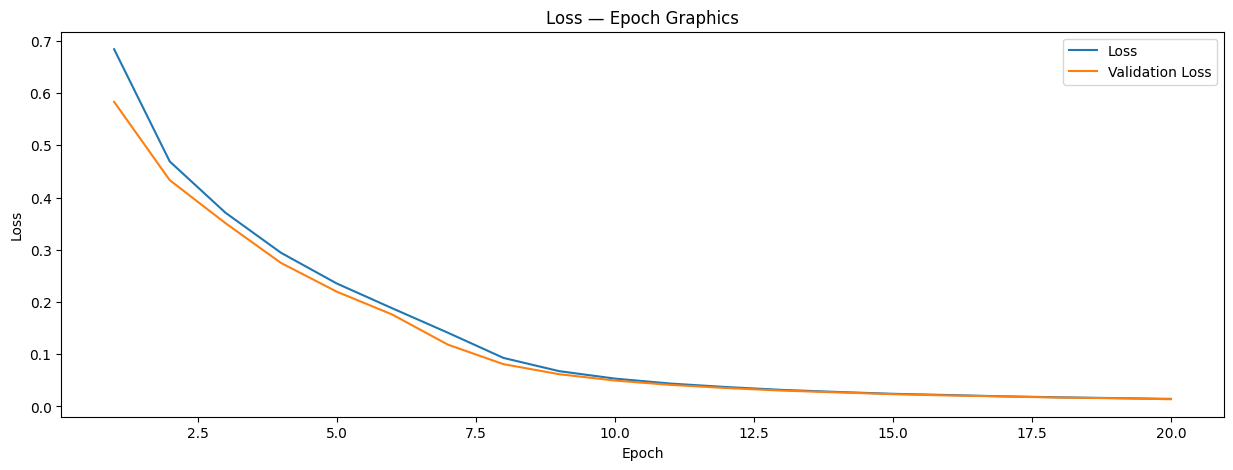

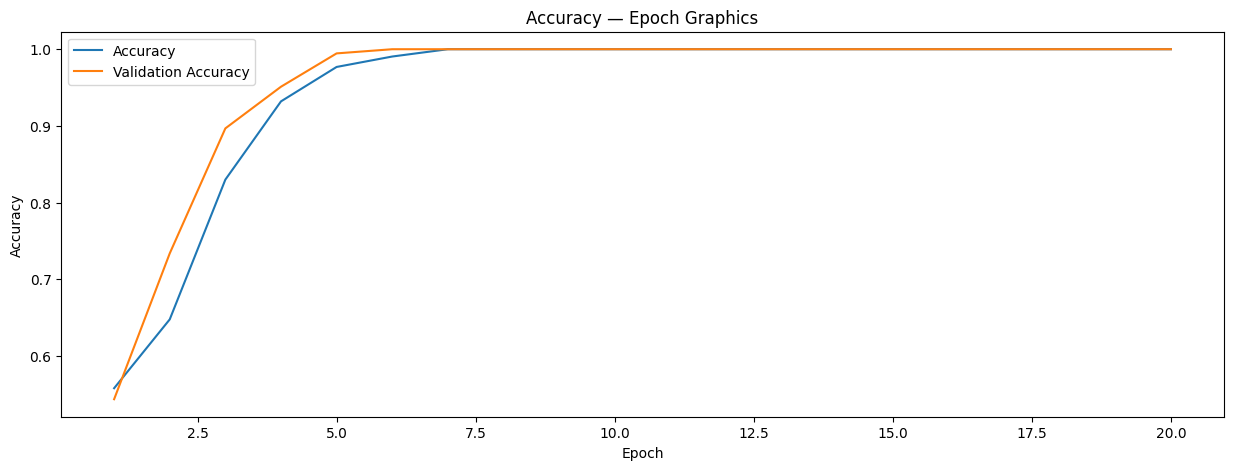

In [11]:
figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Accuracy — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(range(1, len(hist.history['accuracy']) + 1), hist.history['accuracy'])
plt.plot(range(1, len(hist.history['val_accuracy']) + 1), hist.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.show()

In [12]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 4ms/step - loss: 0.0137 - accuracy: 1.0000


[0.013736619614064693, 1.0]

In [13]:
model.predict(X_train.iloc[0:4])

1/1 [==============================] - 0s 171ms/step


array([[9.3035626e-01],
       [9.5975292e-01],
       [2.3914105e-04],
       [9.7561413e-01]], dtype=float32)

In [14]:
X_train.iloc[0:4]

,var_wavelet,skew_wavelet,kurtosis_wavelet,entropy
1201,-0.87340,-0.033118,-0.20165,0.55774
1094,2.01770,1.798200,-2.95810,0.20990
224,-0.36038,4.115800,3.11430,-0.37199
939,-2.05290,3.838500,-0.79544,-1.21380
